### 6-2-1 サンプル問題  
（2019年10月28日にIPA（情報処理推進機構）が公開したPythonのサンプル問題）

#### 〔プログラム〕

In [1]:
import math # 数学関数の標準ライブラリ
import matplotlib.pyplot as plt # グラフ描画の外部ライブラリ

In [2]:
def parse(s):
    return [(x[0], int(x[1:])) for x in s.split(';')]

In [3]:
class Marker:
    def __init__(self):
        self.x, self.y, self.angle = 0, 0, 0
        plt.xlim(-320, 320) # x 軸の表示範囲を設定
        plt.ylim(-240, 240) # y 軸の表示範囲を設定
    
    def forward(self, val):
        # 度数表で表した角度を，ラジアンで表した角度に変換
        rad = math.radians(self.angle)
        dx = val * math.cos(rad)
        dy = val * math.sin(rad)
        x1, y1, x2, y2 = self.x, self.y, self.x + dx, self.y + dy
        # (x1, y1) と (x2, y2) を結ぶ線分を描画
        plt.plot([x1, x2], [y1, y2], color='black', linewidth=2)
        self.x, self.y = x2, y2
    
    def turn(self, val):
        self.angle = (self.angle + val) % 360
    
    def show(self):
        plt.show() # 描画結果を表示
#        print(self.x, self.y, self.angle)

In [4]:
def draw(s):
    insts = parse(s)
    marker = Marker()
    stack = []
    opno = 0
    while opno < len(insts):
        print(stack)
        code, val = insts[opno]
        if code == 'F':
            marker.forward(val)
        elif code == 'T':
            marker.turn(val)
        elif code == 'R':
            stack.append({'opno': opno, 'rest': val})
        elif code == 'E':
            if stack[-1]['rest'] > 1:
                opno = stack[-1]['opno']
                stack[-1]['rest'] -= 1
            else:
                stack.pop()
        opno += 1
    marker.show()

[]
[{'opno': 0, 'rest': 3}]
[{'opno': 0, 'rest': 3}, {'opno': 1, 'rest': 4}]
[{'opno': 0, 'rest': 3}, {'opno': 1, 'rest': 4}]
[{'opno': 0, 'rest': 3}, {'opno': 1, 'rest': 4}]
[{'opno': 0, 'rest': 3}, {'opno': 1, 'rest': 3}]
[{'opno': 0, 'rest': 3}, {'opno': 1, 'rest': 3}]
[{'opno': 0, 'rest': 3}, {'opno': 1, 'rest': 3}]
[{'opno': 0, 'rest': 3}, {'opno': 1, 'rest': 2}]
[{'opno': 0, 'rest': 3}, {'opno': 1, 'rest': 2}]
[{'opno': 0, 'rest': 3}, {'opno': 1, 'rest': 2}]
[{'opno': 0, 'rest': 3}, {'opno': 1, 'rest': 1}]
[{'opno': 0, 'rest': 3}, {'opno': 1, 'rest': 1}]
[{'opno': 0, 'rest': 3}, {'opno': 1, 'rest': 1}]
[{'opno': 0, 'rest': 3}]
[{'opno': 0, 'rest': 3}]
[{'opno': 0, 'rest': 2}]
[{'opno': 0, 'rest': 2}, {'opno': 1, 'rest': 4}]
[{'opno': 0, 'rest': 2}, {'opno': 1, 'rest': 4}]
[{'opno': 0, 'rest': 2}, {'opno': 1, 'rest': 4}]
[{'opno': 0, 'rest': 2}, {'opno': 1, 'rest': 3}]
[{'opno': 0, 'rest': 2}, {'opno': 1, 'rest': 3}]
[{'opno': 0, 'rest': 2}, {'opno': 1, 'rest': 3}]
[{'opno': 0, 'r

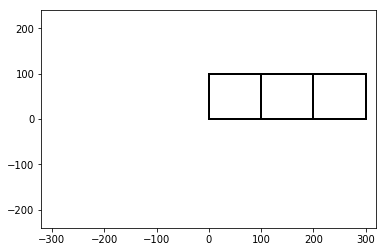

In [5]:
draw('R3;R4;F100;T90;E0;F100;E0')

[]
[{'opno': 0, 'rest': 5}]
[{'opno': 0, 'rest': 5}]
[{'opno': 0, 'rest': 5}]
[{'opno': 0, 'rest': 4}]
[{'opno': 0, 'rest': 4}]
[{'opno': 0, 'rest': 4}]
[{'opno': 0, 'rest': 3}]
[{'opno': 0, 'rest': 3}]
[{'opno': 0, 'rest': 3}]
[{'opno': 0, 'rest': 2}]
[{'opno': 0, 'rest': 2}]
[{'opno': 0, 'rest': 2}]
[{'opno': 0, 'rest': 1}]
[{'opno': 0, 'rest': 1}]
[{'opno': 0, 'rest': 1}]


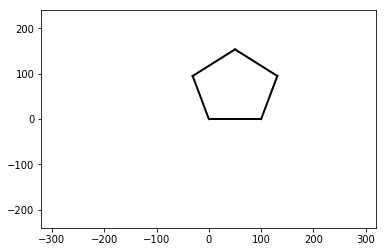

In [6]:
draw('R5;F100;T72;E0')

[]
[]
[]
[]
[]


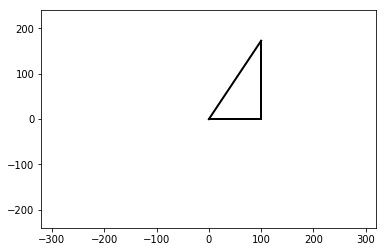

In [7]:
draw('F100;T90;F173;T150;F200')